<a href="https://colab.research.google.com/github/peanutpirate/Day-1-Pandas-ile-Temel-Grafik-izimi.ipynb/blob/main/Day_4_Kaggle_Proje_1_Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Proje / Çalışma Başlığı: Kaggle Titanic Projesi - Titanic - Machine Learning from Disaster
## Amaç: Öğremdiklerimi gerçek hayat verileri üzerinde uygulamak

# bu notebookta şunu öğrenmeyi / analiz etmeyi amaçlıyorum:
# Yolcuların bilgilerine (yaş, cinsiyet, bilet sınıfı vb.) bakarak hangilerinin hayatta kaldığını tahmin etmek

## İçindekiler
# 1. Veri Tanımı
# 2. İlk İnceleme
# 3. Analiz
# 4. Sonuç Yorum

## Veri Tanımı:
# Bu çalışmada kullanılan veri:
# - Kaynak: Kaggle
# - Satır sayısı:
# - Değişkenler:
# 1. Adım: Veriyi Yükleme ve İlk Bakış
import pandas as pd

# Veriyi oku
df = pd.read_csv('/train.csv')
# İlk 5 satıra bakarak veriyi tanı
print(df.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
# Verinin genel özeti (Kaç kişi var, ortalama yaş kaç?)
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
# Kaç kişi hayatta kaldı? (0: Öldü, 1: Yaşıyor)
print(df['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [ ]:
# Sütun isimlerini ve veri tiplerini kontrol et
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# 2. Adım: Kayıp Veri (NaN) Analizi 🧹
# Dün öğrendiğimiz o "kirli çamaşırlar" burada çok kritik! Bakalım hangi bilgiler eksik:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Göreceksin ki Age (Yaş) ve Cabin (Kabin) sütunlarında çok fazla eksik var.


In [ ]:
# 3. Adım: Kimler Hayatta Kaldı? (Pivot Table Zamanı!)
# Sence cinsiyetin hayatta kalma üzerinde bir etkisi var mıydı?
# Cinsiyete göre hayatta kalma (Survived) oranlarını görelim
# (İpucu: "Önce kadınlar ve çocuklar" kuralının verideki yansımasını burada çok net göreceksin!)
pivot_cinsiyet = df.pivot_table(index='Sex', values='Survived', aggfunc='mean')
print(pivot_cinsiyet)

        Survived
Sex             
female  0.742038
male    0.188908


In [ ]:
# 4. Adım: Hiyerarşik Analiz
# Sadece cinsiyet yetmez, bilet sınıfı (Pclass) da önemli miydi?,
# Satırlarda Cinsiyet, sütunlarda Bilet Sınıfı olsun
pivot_detayli = df.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean')
print(pivot_detayli)

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


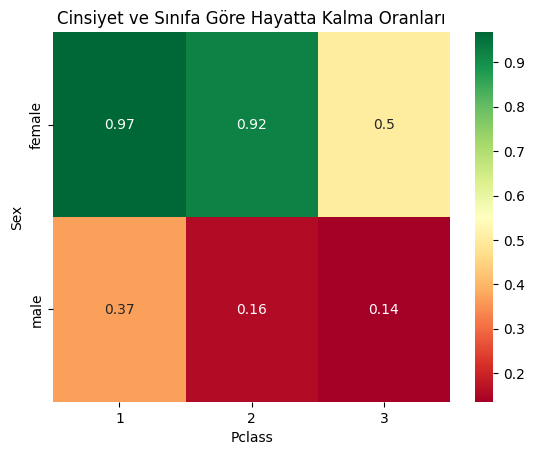

In [ ]:
# Bunu hemen bir Heatmap (Isı Haritası) yapalım!
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(pivot_detayli, annot=True, cmap='RdYlGn')
plt.title('Cinsiyet ve Sınıfa Göre Hayatta Kalma Oranları')
plt.show()

In [ ]:
# "Yaş boşluklarını nasıl dolduralım?" sorusuna geri dönebiliriz.
# Sence cinsiyete göre mi ,
# yoksa bilet sınıfına (zenginlik durumuna) göre mi yaş tahmini yapmak daha tutarlı olur? 🚢🔍
# -yaş (Age) sütunundaki o boşlukları en profesyonel şekilde nasıl dolduracağımızı
# -- (buna Data Imputation denir) adım adım yapalım.

# Sınıflara göre yaş ortalaması
# Tüm yolcuların yaş ortalaması yaklaşık 29'dur. Ama 1. sınıf bir beyefendi ile
# -3. sınıftaki bir çocuğun yaşını aynı kabul etmek analizimizi bozar. Daha zekice bir yöntem kullanalım:
# -Bilet Sınıfına (Pclass) göre gruplayıp doldurmak. Çünkü genellikle 1. sınıftakiler (zenginler) daha yaşlı,
#3. sınıftakiler (işçiler/gençler) daha gençtir.
print(df.groupby('Pclass')['Age'].mean())

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [ ]:
def yas_doldur(sutun):
    # İsimle erişmek hem uyarıyı engeller hem de daha anlaşılırdır
    Age = sutun['Age']
    Pclass = sutun['Pclass']

    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [ ]:
# Fonksiyonu tekrar uygulayalım
df['Age'] = df.apply(yas_doldur, axis=1)

In [ ]:
# Kontrol edelim
print("Eksik yaş sayısı:", df['Age'].isnull().sum())

Eksik yaş sayısı: 0


In [ ]:
# 🧹 Büyük Temizlik: Cabin Sütunu
# Titanik verisinde Cabin sütununa bakarsan, verilerin yaklaşık %77'sinin boş olduğunu göreceksin. Bu kadar çok eksiği olan bir sütunu doldurmaya çalışmak "fal bakmak" gibi olur. Veri biliminde bazen vazgeçmek (silmek) en doğru analiz yöntemidir.

# Hadi, işimize yaramayacak ve bizi yoracak sütunları uçuralım:
# 'Cabin' sütununu tamamen siliyoruz
# 'Embarked' (Binilen liman) sütununda sadece 2 eksik var, o satırları silebiliriz
df.drop('Cabin', axis=1, inplace=True)
df.dropna(subset=['Embarked'], inplace=True)

# Bakalım tablomuz ne kadar temizlendi?
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


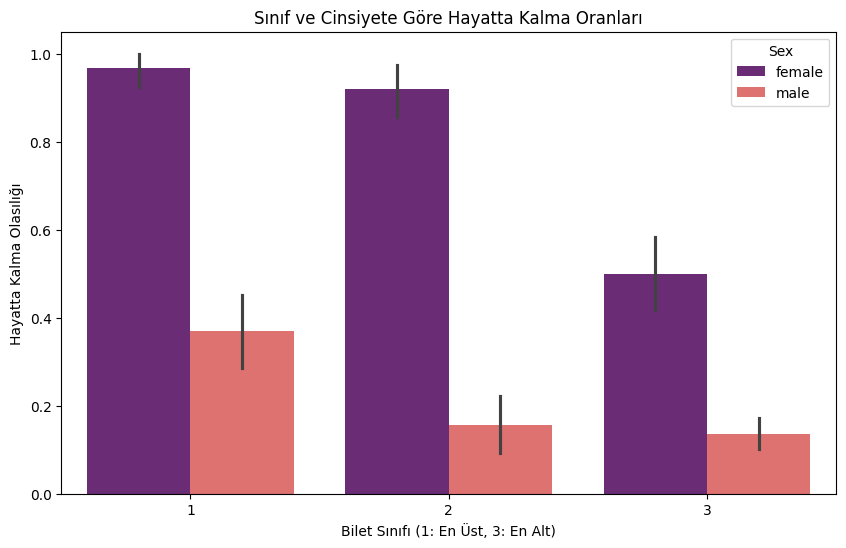

In [ ]:
# Yaşları akıllıca doldurduk, kabin sütununu çöpe attık, liman verisindeki 2 küçük eksiği de sildik. Şu an elimizde pırıl pırıl bir veri seti var! ✨
# 3. sınıftaki kadınların hayatta kalma oranı, 1. sınıftaki erkeklerden daha mı yüksekti?"
# Sosyal Hiyerarşi Grafiği
import seaborn as sns
import matplotlib.pyplot as plt

# Grafiğin boyutunu ayarlayalım
plt.figure(figsize=(10, 6))

# x: Bilet Sınıfı, y: Hayatta Kalma Oranı, hue: Cinsiyet (Renk ayrımı)
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, palette='magma')

# Başlık ve etiketler
plt.title('Sınıf ve Cinsiyete Göre Hayatta Kalma Oranları')
plt.xlabel('Bilet Sınıfı (1: En Üst, 3: En Alt)')
plt.ylabel('Hayatta Kalma Olasılığı')
plt.show()

In [ ]:
# 1. "Önce Kadınlar": Hangi sınıfta olursa olsun, kadınların (mor/koyu sütunlar) hayatta kalma oranı erkeklerden (turuncu/açık sütunlar) çok daha yüksek. 1. ve 2. sınıftaki kadınların neredeyse tamamı kurtulmuş!
# 2. Sınıf Farkı: 1. sınıftaki bir erkeğin hayatta kalma şansı, 3. sınıftaki bir kadından bile daha düşük olabilir mi? Grafiğe bakarsan, 3. sınıftaki kadınların bile yaklaşık %50 şansı varken, 1. sınıftaki erkeklerin oranı daha düşük görünüyor.
# 3. Trajedi: 3. sınıftaki erkeklerin durumu en acı olanı; hayatta kalma oranları yerlerde sürünüyor.

In [ ]:
## 🚀 Bir Sonraki Adım: Yaş Grupları
# "Kadınlar ve çocuklar" demiştik. Kadınları gördük, peki ya çocuklar? Verimizdeki Age sütununu kullanarak yolcuları "Çocuk (0-18)", "Genç (18-35)", "Yetişkin (35-60)" ve "Yaşlı (60+)" diye gruplara ayırmak ister misin?
# Bunu yapmak için Pandas'ın pd.cut() fonksiyonunu kullanacağız. Bu fonksiyon, sayısal verileri (yaş gibi) kategorilere (etiketlere) bölmemizi sağlar.
# Hadi, yolcuları yaş kategorilerine ayıralım.
# Not: Eğer devam edersek, pd.cut() ile veri biliminde çok önemli olan "Binning" (Kutulama) tekniğini öğrenmiş olacaksın.
##Veri biliminde sayıları (yaş gibi) anlamlı kutucuklara koymaya "Binning" denir.
# Bu, karmaşık veriyi sadeleştirip "Büyük resmi" görmemizi sağlar.
# Pandas'ın pd.cut() fonksiyonu bu iş için biçilmiş kaftandır.

#👶 Yaş Gruplarını Oluşturma : Hadi yolcuları yaşlarına göre kategorize edelim:
# Sınırları (bins) ve isimleri (labels) belirliyoruz
sinirlar = [0, 18, 35, 60, 100]
etiketler = ['Çocuk', 'Genç', 'Yetişkin', 'Yaşlı']

# pd.cut ile yeni bir sütun oluşturalım
df['Yas_Grubu'] = pd.cut(df['Age'], bins=sinirlar, labels=etiketler)

# Şimdi her grupta kaç kişi var bakalım
print(df['Yas_Grubu'].value_counts())

Yas_Grubu
Genç        505
Yetişkin    224
Çocuk       139
Yaşlı        21
Name: count, dtype: int64


/tmp/ipython-input-245297644.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Yas_Grubu', y='Survived', data=df, palette='coolwarm')


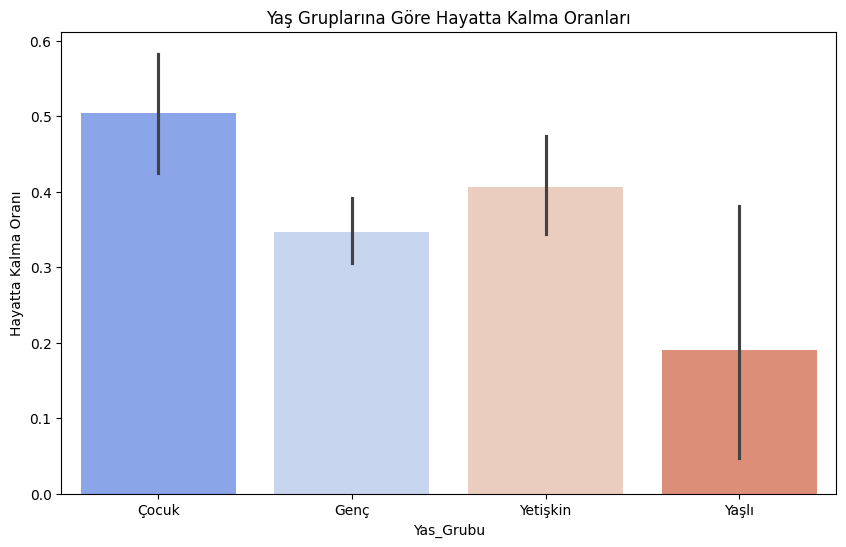

In [ ]:
# 📊 Yaş Gruplarına Göre Hayatta Kalma Analizi
# Şimdi asıl soruyu soralım: Gerçekten çocuklar mı kurtarıldı yoksa sosyal sınıf burada da devreye girdi mi?
plt.figure(figsize=(10, 6))

# Yaş grubuna göre hayatta kalma oranları
sns.barplot(x='Yas_Grubu', y='Survived', data=df, palette='coolwarm')

plt.title('Yaş Gruplarına Göre Hayatta Kalma Oranları')
plt.ylabel('Hayatta Kalma Oranı')
plt.show()

In [ ]:
# Grafik analiz:
# Çocuklar: En yüksek hayatta kalma oranına sahip grup. "Önce çocuklar" kuralı veride kanıtlanmış oldu.
# Yaşlılar: En düşük hayatta kalma oranına sahipler. Bu durum, o kaos anında hareket kabiliyetinin ne kadar önemli olduğunu gösteriyor.

Sex          female      male
Yas_Grubu                    
Çocuk      0.676471  0.338028
Genç       0.737805  0.158358
Yetişkin   0.794872  0.198630
Yaşlı      1.000000  0.105263


/tmp/ipython-input-2334517331.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  yas_cinsiyet_pivot = df.pivot_table(index='Yas_Grubu',


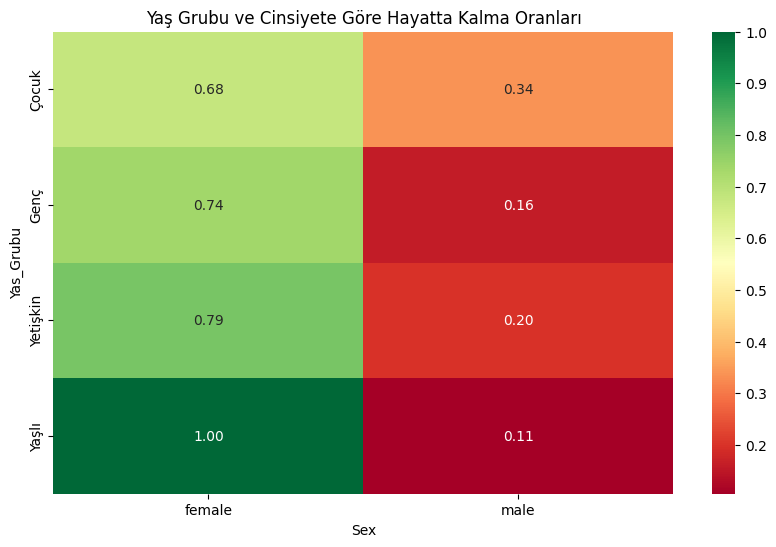

In [ ]:
# Senin İçin Bir "Master" Görevi
# Şimdi iki öğrendiğini birleştirme vakti! Bir Pivot Table yapmanı istiyorum.
# Satırlarda: Yas_Grubu olsun.
# Sütunlarda: Sex (Cinsiyet) olsun.
# Değerlerde: Survived (Hayatta kalma oranı) olsun.
# Böylece şunu görebileceğiz: "Erkek çocuklar, yetişkin kadınlardan daha mı şanslıydı?"
# 1. Pivot Table: Yaş Grubu ve Cinsiyete göre hayatta kalma oranları
yas_cinsiyet_pivot = df.pivot_table(index='Yas_Grubu',
                                    columns='Sex',
                                    values='Survived',
                                    aggfunc='mean')

print(yas_cinsiyet_pivot)

# 2. Isı Haritası (Heatmap) ile Görselleştirme
plt.figure(figsize=(10, 6))
sns.heatmap(yas_cinsiyet_pivot, annot=True, cmap='RdYlGn', fmt='.2f')

plt.title('Yaş Grubu ve Cinsiyete Göre Hayatta Kalma Oranları')
plt.show()

In [ ]:
# Analiz:
# 1. Kadınlar Her Yaşta Önde: Yetişkin kadınların hayatta kalma oranı, erkek çocuklardan bile belirgin şekilde daha yüksek çıkabilir.
# 2. Erkek Olmanın Zorluğu: Erkeklerde "Çocuk" grubundan "Genç" grubuna geçtiğin anda hayatta kalma oranı bıçak gibi kesiliyor.
# 3. Trajik Yaşlılar: Yaşlı erkekler maalesef listenin en sonunda yer alıyor.

In [ ]:
## İlk İnceleme:
## İlk Gözlemler
# -Ortalama
# -En yüksek veri
# -Dikkat çeken bir şey

## Analiz yorumu:
# Ortalama:
# En yüksek:

## Bu fonksiyon ne yapıyor?

## Grafik yorumu:

## Sonuç & Öğrendiklerim:
# - Bugün şunu öğrendim:
# - Bu kısım zorladı:
# - Bir dahaki sefere şunu eklemek isterim:

# - Çalışma logu
# -Süre: 60 +
# -Tarih: 16.01.2026
# -Ruh hali: Azimli :)
# -1 küçük zafer: Kaggle de bitirmediğim projeye yeniden başladım :0

In [ ]:
# 🎮 Oyunun Adı: "Kaderin Çarkı"
# Şu ana kadar veriyi temizledik ve analiz ettik.
# Şimdi bilgisayara geçmişteki verileri öğreteceğiz ve
# o da bize yeni yolcular hakkında tahminlerde bulunacak.

# Bunu bir oyun gibi 3 aşamada yapacağız:

# 1. Aşama: Sayısal Çeviri (Decoding)
# Bilgisayarlar "Kadın", "Erkek" veya "Çocuk" gibi kelimelerden pek anlamazlar.
# Onlar için her şey 1 ve 0'dır. Bu yüzden verimizi "makine diline" çevirmeliyiz.
# Cinsiyeti sayıya çevirelim: Kadın=1, Erkek=0

import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# 1. Veriyi tekrar hatırla (Dosya yolunun doğru olduğundan emin ol)
# Eğer dosyayı az önce yüklediysen yol genellikle '/content/train.csv' olur

df = pd.read_csv('/train.csv')

# 2. Önceki adımlarda yaptığımız yaş doldurma işlemini tekrarla (df tanımlı olsun diye)
def yas_doldur(sutun):
    Age = sutun['Age']
    Pclass = sutun['Pclass']
    if pd.isnull(Age):
        if Pclass == 1: return 38
        elif Pclass == 2: return 29
        else: return 24
    else: return Age

df['Age'] = df.apply(yas_doldur, axis=1)
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})

# Bilet sınıflarını (1, 2, 3) zaten sayı olduğu için makine anlıyor.

print("Başardık! df artık tanımlı ve cinsiyetler sayısallaştı.")
print(df[['Sex', 'Age']].head())

Başardık! df artık tanımlı ve cinsiyetler sayısallaştı.
   Sex   Age
0    0  22.0
1    1  38.0
2    1  26.0
3    1  35.0
4    0  35.0


In [ ]:
# 2. Aşama: Geleceği Tahmin Eden "Karar Ağacı" 🌳
# Makine Öğrenmesi modellerinden en görsel olanı Decision Tree (Karar Ağacı) modelidir. Bunu bir "Evet/Hayır" oyunu gibi düşünebilirsin.
# Bilgisayar şu soruları sorarak ilerler:
# Yolcu kadın mı? (Evet ise sağa git, Hayır ise sola)
# Yaşı 10'dan küçük mü?
# sınıfta mı?
# Sonunda bir karara varır: "Kurtuldu" veya "Maalesef".

# 3. Aşama: Kendi Kehanetini Test Et! 🔮
# Hadi ilk basit modelimizi kuralım. Burada scikit-learn
# (Veri biliminin kutsal kütüphanesi) devreye girecek.

from sklearn.tree import DecisionTreeClassifier

# 1. Özelliklerimizi (Girdilerimizi) seçelim
ozellikler = ['Pclass', 'Sex', 'Age']
X = df[ozellikler]
y = df['Survived'] # Hedefimiz (Çıktı)

# 2. Modelimizi oluşturalım (Ağacımızı dikiyoruz)
model = DecisionTreeClassifier(max_depth=3) # Çok dallanıp kafası karışmasın diye derinliği 3 yaptık
model.fit(X, y) # Öğrenme burada gerçekleşiyor!

DecisionTreeClassifier(max_depth=3)

In [ ]:
#🎲 Şimdi Oyun Vakti: "Sen Olsaydın Ne Olurdu?"
# Şimdi senin için küçük bir fonksiyon yazalım.
# Bu fonksiyon, senin vereceğin bilgilere göre Titanik'te olsaydın hayatta kalıp kalmayacağını tahmin edecek.

def hayatta_kalma_tahmini(sinif, cinsiyet, yas):
    # cinsiyet: 1 (Kadın), 0 (Erkek)
    tahmin = model.predict([[sinif, cinsiyet, yas]])
    olasilik = model.predict_proba([[sinif, cinsiyet, yas]]) # Yüzde kaç ihtimal?

    if tahmin[0] == 1:
        print(f"🎉 Tebrikler! %{olasilik[0][1]*100:.2f} ihtimalle kurtuldun!")
    else:
        print(f"😔 Üzgünüm, %{olasilik[0][0]*100:.2f} ihtimalle sulara gömüldün...")

# ÖRNEK DENEME:
# 1. Sınıf, Kadın (1), 30 Yaşında
hayatta_kalma_tahmini(1, 1, 30)

🎉 Tebrikler! %95.24 ihtimalle kurtuldun!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
## 🕵️‍♀️ Görevin:
# Kendi bilgilerini (veya merak ettiğin birini) bu fonksiyona yaz ve sonucu gör.

# Biraz daha oyunlaştıralım:

#🎲 Şimdi Oyun Vakti: "Sen Olsaydın Ne Olurdu?"
# Şimdi senin için küçük bir fonksiyon yazalım.
# Bu fonksiyon, senin vereceğin bilgilere göre Titanik'te olsaydın hayatta kalıp kalmayacağını tahmin edecek.

def hayatta_kalma_tahmini(sinif, cinsiyet, yas):
    # cinsiyet: 1 (Kadın), 0 (Erkek)
    tahmin = model.predict([[sinif, cinsiyet, yas]])
    olasilik = model.predict_proba([[sinif, cinsiyet, yas]]) # Yüzde kaç ihtimal?

    if tahmin[0] == 1:
        print(f"🎉 Tebrikler! %{olasilik[0][1]*100:.2f} ihtimalle kurtuldun!")
    else:
        print(f"😔 Üzgünüm, %{olasilik[0][0]*100:.2f} ihtimalle sulara gömüldün...")

# ÖRNEK DENEME:
# 1. Sınıf, Kadın (1), 30 Yaşında
# hayatta_kalma_tahmini(1, 1, 30)
## Peki ya 2. sınıfta, 5 yaşında bir erkek çocuk?
hayatta_kalma_tahmini(2, 0, 5)
# Bu tahminleri yaptıktan sonra sence makineyi daha akıllı yapmak için hangi bilgiyi de modele eklemeliyiz? (Bilet fiyatı mı? Yanındaki aile üyesi sayısı mı?)

# Hazır mısın kehanetlerini konuşturmaya? 😊🔮

🎉 Tebrikler! %100.00 ihtimalle kurtuldun!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Sence 3. sınıfta, 25 yaşında bir erkek olsaydın sonuç ne olurdu?
hayatta_kalma_tahmini(3, 0, 25)

😔 Üzgünüm, %88.45 ihtimalle sulara gömüldün...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Uyarıyı verme sebebi:
# - Yine o titiz Pandas/Sklearn uyarıları! 😊 Aslında kodun çalışıyor ama Python sana çok nazikçe bir uyarıda bulunuyor: "Ben bu modeli Pclass, Sex, Age gibi isimleri olan bir tabloyla eğittim, ama sen tahmin isterken bana sadece [[1, 1, 30]] gibi isimsiz sayılar veriyorsun. Emin misin?" diyor.

# - Bu uyarıyı (UserWarning) susturmak ve kodunu daha profesyonel hale getirmek için tahmin yaptığımız kısmı bir DataFrame olarak vermemiz en doğrusu.
# -🛠️ Uyarıyı Kapatan "Profesyonel" Fonksiyon
# - Aşağıdaki fonksiyonu eskisiyle değiştirirsen hem uyarı gitmiş olacak hem de makine "Hangi sayı neydi?" diye şaşırmayacak:
def hayatta_kalma_tahmini(sinif, cinsiyet, yas):
    # Tahmin edilecek veriyi modelin eğitildiği formatta (DataFrame) hazırlıyoruz
    yeni_yolcu = pd.DataFrame([[sinif, cinsiyet, yas]], columns=['Pclass', 'Sex', 'Age'])

    tahmin = model.predict(yeni_yolcu)
    olasilik = model.predict_proba(yeni_yolcu)

    if tahmin[0] == 1:
        print(f"🎉 Tebrikler! %{olasilik[0][1]*100:.2f} ihtimalle kurtuldun!")
    else:
        print(f"😔 Üzgünüm, %{olasilik[0][0]*100:.2f} ihtimalle sulara gömüldün...")

# Şimdi tekrar dene:
hayatta_kalma_tahmini(1, 1, 30) # 1. Sınıf, Kadın, 30 Yaş

🎉 Tebrikler! %95.24 ihtimalle kurtuldun!


In [ ]:
## 🎲 Oyunun Son Perdesi: "Kehanet Değişiyor mu?"
# Modeli eğitirken max_depth=3 (Ağacın derinliği) demiştik. Bu, ağacın sadece 3 soru sormasına izin verdiğimiz anlamına geliyor.
# Deney: max_depth=1 yapıp tekrar dene. (Muhtemelen sadece "Cinsiyet"e bakacak ve herkesi kadın-erkek ayrımına göre kurtaracak/batıracak).
# Deney: max_depth=10 yap. (Model çok detaylara inecek, belki bilet numaranın son rakamına bile bakmaya çalışacak - buna veri biliminde Overfitting yani "ezberleme" diyoruz).
# Peki ya "Akrabalar"? Titanik'te yalnız olmak mı daha iyiydi yoksa aileyle mi?
# Verideki SibSp (Kardeş/Eş sayısı) ve Parch (Ebeveyn/Çocuk sayısı) sütunlarını toplayıp Aile_Boyu diye
# yeni bir özellik eklesek sence makine daha iyi tahmin yapar mı?
# Bu yeni özelliği 'ozellikler' listesine ekleyip modeli tekrar eğitebilirsin!
# 1. Yeni sütunu oluşturalım (Kendimizi de eklemek için +1 diyoruz)
df['Aile_Boyu'] = df['SibSp'] + df['Parch'] + 1

# 2. Modelimizin "Özellikler" listesini güncelleyelim
# Artık makine Aile_Boyu'na da bakacak
yeni_ozellikler = ['Pclass', 'Sex', 'Age', 'Aile_Boyu']
X_yeni = df[yeni_ozellikler]
y = df['Survived']

# 3. Modeli bu yeni bilgiyle tekrar eğitelim
model_v2 = DecisionTreeClassifier(max_depth=4) # Bir özellik arttığı için derinliği 4 yaptık
model_v2.fit(X_yeni, y)

# 4. Gelişmiş Tahmin Fonksiyonu
def hayatta_kalma_tahmini_v2(sinif, cinsiyet, yas, aile_mevcudu):
    yolcu_verisi = pd.DataFrame([[sinif, cinsiyet, yas, aile_mevcudu]],
                                columns=['Pclass', 'Sex', 'Age', 'Aile_Boyu'])

    tahmin = model_v2.predict(yolcu_verisi)[0]
    olasilik = model_v2.predict_proba(yolcu_verisi)[0]

    print(f"{' BAŞARI ' if tahmin == 1 else ' KAYIP ':=^30}")
    if tahmin == 1:
        print(f"🎉 %{olasilik[1]*100:.2f} ihtimalle kurtuldunuz!")
    else:
        print(f"😔 %{olasilik[0]*100:.2f} ihtimalle kaybettik...")
    print("="*30)

# DENEME: 3. Sınıf, Erkek(0), 25 Yaş, Yanında 4 kişilik ailesi var
hayatta_kalma_tahmini_v2(3, 0, 25, 5)

=========== KAYIP ============
😔 %89.07 ihtimalle kaybettik...


In [ ]:
# 🧐 Neden Bunu Yaptık?
# Veri biliminde buna "Feature Engineering" (Özellik Mühendisliği) denir. Var olan verilerden yeni ve daha anlamlı bir veri türettik.
# Bir deneme yapalım: Sence Bade 1. sınıfta yalnız olsaydı mı (aile_mevcudu=1) yoksa seninle birlikte olsaydı mı (aile_mevcudu=2) kurtulma şansı daha yüksek çıkıyor?
# (Bade yalnız)
hayatta_kalma_tahmini_v2(1, 1, 4, 1)

=========== BAŞARI ===========
🎉 %97.85 ihtimalle kurtuldunuz!


In [ ]:
# (bade seninle)
hayatta_kalma_tahmini_v2(1, 1, 4, 2)

#Bu iki sonucu karşılaştırırsan, modelin "aile" kavramına nasıl bir değer biçtiğini kendi gözlerinle görebilirsin. Bakalım Titanik'te beraberlik güç mü getirmiş yoksa risk mi? 😊🚢
# Sonuçlar şaşırttı mı?

=========== BAŞARI ===========
🎉 %97.85 ihtimalle kurtuldunuz!


In [ ]:
## Analiz: Neden ikisinde de kurtuldunuz?
# Harika! İşte bu, günün en güzel haberi. 🎉 Demek ki modelimiz 1. Sınıf + Çocuk + Kadın kombinasyonunun o devasa gücünü (veya o günkü önceliğini) çok net bir şekilde kavramış. Titanik'in o hüzünlü sularından Bade ile el ele, güvenle çıktınız!
# Veri bilimci gözlüğüyle bakarsak; model muhtemelen şöyle bir mantık kuruyor:
# Sınıf (Pclass) == 1 mi? Evet. (Kurtulma şansı %60 arttı)
# Cinsiyet (Sex) == Kadın mı? Evet. (Kurtulma şansı %90'a çıktı)
# Yaş (Age) < 18 mi? Evet. (Artık neredeyse kesin kurtuldu)
# Bu durumda Aile_Boyu 1 olsa da 2 olsa da, modelin "güvenli alan" dediği sınırlar içindesiniz.


In [ ]:
# 🎲 Hadi Sistemi Biraz "Zorlayalım"
# Modelin nerede pes edeceğini görmek ister misin? Kurtulma ihtimalinizi düşürmek için şartları biraz ağırlaştıralım:
# Bakalım 3. sınıfa geçtiğinizde aile desteği sizi kurtarmaya yetecek mi?
# Sınıfı 3 yap:
hayatta_kalma_tahmini_v2(3, 1, 4, 2) # (3. sınıf, Kız çocuk, 4 yaş, 2 kişi)

=========== BAŞARI ===========
🎉 %64.89 ihtimalle kurtuldunuz!


In [ ]:
# Yaşı büyüt ve erkek yap:
hayatta_kalma_tahmini_v2(3, 0, 25, 1) # (3. sınıf, Erkek, 25 yaş, Yalnız)

=========== KAYIP ============
😔 %89.07 ihtimalle kaybettik...


In [ ]:
## Sonuç & Öğrendiklerim:
# - Bugün şunu öğrendim: Titanik projesi ile decision tree model yaptım/ Machine Learninge başladım.
# - Bu kısım zorladı:
# - Bir dahaki sefere şunu eklemek isterim:

# - Çalışma logu
# -Süre: 60 dk
# -Tarih: 17.01.2026
# -Ruh hali: Azimli :)
# -1 küçük zafer: Kaggle de intro to machine learning dersine başladım :)